In [26]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz

In [19]:
def generate_params(year):
    start_date = f'01/01/{year} 00:00:00'
    end_date = f'12/31/{year} 23:59:00'

    gmt = pytz.timezone('GMT')  # Use GMT timezone
    start_datetime = gmt.localize(datetime.datetime.strptime(start_date, '%m/%d/%Y %H:%M:%S'))
    end_datetime = gmt.localize(datetime.datetime.strptime(end_date, '%m/%d/%Y %H:%M:%S'))

    s_time_id = int(start_datetime.timestamp())
    e_time_id = int(end_datetime.timestamp())

    params = {
        'report_form': '1',
        'dnode': 'District',
        'content': 'loops',
        'tab': 'det_district_summary',
        'export': 'xls',
        'district_id': '12',
        's_time_id': str(s_time_id),
        's_time_id_f': start_datetime.strftime('%m/%d/%Y'),
        'e_time_id': str(e_time_id),
        'e_time_id_f': end_datetime.strftime('%m/%d/%Y'),
        'tod': 'all',
        'tod_from': '0',
        'tod_to': '0',
        'dow_0': 'on',
        'dow_1': 'on',
        'dow_2': 'on',
        'dow_3': 'on',
        'dow_4': 'on',
        'dow_5': 'on',
        'dow_6': 'on',
        'holidays': 'on',
        'q': 'vmt',
    }

    return params

In [21]:
import requests
cookies = {
    'nmstat': '427c4c1c-3146-c5f9-1ad3-3d495785a86b',
    '__utmz': '267661199.1706304002.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    '_ga': 'GA1.2.1813768829.1706303996',
    '_ga_WLDEF7NZZ2': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '_ga_PXR8P55JR4': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '_ga_69TD0KNT0F': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '__utma': '158387685.1813768829.1706303996.1708129754.1708129754.1',
    '__utmz': '158387685.1708129754.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    'PHPSESSID': 'ac15ad1a15581add20d029523dc979d6',
    '__utma': '267661199.1813768829.1706303996.1709434499.1709926451.29',
    '__utmc': '267661199',
    '__utmt': '1',
    '__utmb': '267661199.3.10.1709926451',
}

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
    # 'Cookie': 'nmstat=427c4c1c-3146-c5f9-1ad3-3d495785a86b; __utmz=267661199.1706304002.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); _ga=GA1.2.1813768829.1706303996; _ga_WLDEF7NZZ2=GS1.1.1707246298.4.0.1707246298.0.0.0; _ga_PXR8P55JR4=GS1.1.1707246298.4.0.1707246298.0.0.0; _ga_69TD0KNT0F=GS1.1.1707246298.4.0.1707246298.0.0.0; __utma=158387685.1813768829.1706303996.1708129754.1708129754.1; __utmz=158387685.1708129754.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); PHPSESSID=ac15ad1a15581add20d029523dc979d6; __utma=267661199.1813768829.1706303996.1709434499.1709926451.29; __utmc=267661199; __utmt=1; __utmb=267661199.3.10.1709926451',
    'Referer': 'https://pems.dot.ca.gov/?fwy=5&dir=N&district_id=12&html_x=55&report_form=1&s_time_id=1104537600&e_time_id=1417478340&dnode=Freeway&content=modeling&tab=fwy_animation&yy=2024&mm=1&dd=25&from_hh=16&to_hh=18&start_pm=72.9&end_pm=116.61&showstations=0&showbn=0&showincidents=1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Chromium";v="122", "Not(A:Brand";v="24", "Google Chrome";v="122"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
}

In [22]:
for year in range(2002, 2023):
    params = generate_params(year)
    response = requests.get('https://pems.dot.ca.gov/', params=params, cookies=cookies, headers=headers)

    # Save the response content to a file
    filename = f'd12fwy{year}.xlsx'
    with open(filename, 'wb') as file:
        file.write(response.content)

    print(f'{filename} created successfully.')

d12fwy2002.xlsx created successfully.
d12fwy2003.xlsx created successfully.
d12fwy2004.xlsx created successfully.
d12fwy2005.xlsx created successfully.
d12fwy2006.xlsx created successfully.
d12fwy2007.xlsx created successfully.
d12fwy2008.xlsx created successfully.
d12fwy2009.xlsx created successfully.
d12fwy2010.xlsx created successfully.
d12fwy2011.xlsx created successfully.
d12fwy2012.xlsx created successfully.
d12fwy2013.xlsx created successfully.
d12fwy2014.xlsx created successfully.
d12fwy2015.xlsx created successfully.
d12fwy2016.xlsx created successfully.
d12fwy2017.xlsx created successfully.
d12fwy2018.xlsx created successfully.
d12fwy2019.xlsx created successfully.
d12fwy2020.xlsx created successfully.
d12fwy2021.xlsx created successfully.
d12fwy2022.xlsx created successfully.


In [27]:
pd.read_excel('d12fwy2022.xlsx')['Freeway'].unique()


array(['I405-N', 'I405-S', 'I5-N', 'I5-S', 'I605-N', 'I605-S', 'SR1-N',
       'SR1-S', 'SR133-N', 'SR133-S', 'SR142-E', 'SR142-W', 'SR22-E',
       'SR22-W', 'SR241-N', 'SR241-S', 'SR261-N', 'SR261-S', 'SR55-N',
       'SR55-S', 'SR57-N', 'SR57-S', 'SR73-N', 'SR73-S', 'SR74-E',
       'SR74-W', 'SR91-E', 'SR91-W'], dtype=object)

In [45]:
# file_names = [f'd12fwy{year}.xlsx' for year in range(2002, 2023)]
# freeway = 'SR142-E'

# # Initialize a list to store tuples (year, VMT)
# data_list = []

# # Iterate over Excel files and directly extract data
# for file_name in file_names:
#     year = int(file_name[-9:-5])
#     df = pd.read_excel(file_name)

#     # Check if the DataFrame is empty for the given freeway
#     if not df[df['Freeway'] == freeway].empty:
#         vmt_value = df[df['Freeway'] == freeway]['Vehicle Miles Traveled (VMT)'].iloc[0]
#     else:
#         vmt_value = 0

#     data_list.append((year, vmt_value))

# # Create the result DataFrame directly from the list of tuples
# result_df = pd.DataFrame(data_list, columns=['Year', 'VMT'])

# # Plot the results
# plt.plot(result_df['Year'], result_df['VMT'])
# plt.xlabel('Year')
# plt.ylabel('Vehicle Miles Traveled (VMT)')
# plt.title('District 12: ' + freeway)

# # Set x-axis ticks with integer values corresponding to the years
# plt.xticks(range(2000, 2023, 5))

# # Display the plot
# plt.show()


In [46]:
# def plot_freeway_vmt(freeway):
#     file_names = [f'd12fwy{year}.xlsx' for year in range(2002, 2023)]

#     # Initialize a list to store tuples (year, VMT)
#     data_list = []

#     # Iterate over Excel files and directly extract data
#     for file_name in file_names:
#         year = int(file_name[-9:-5])
#         df = pd.read_excel(file_name)

#         # Check if the DataFrame is empty for the given freeway
#         if not df[df['Freeway'] == freeway].empty:
#             vmt_value = df[df['Freeway'] == freeway]['Vehicle Miles Traveled (VMT)'].iloc[0]
#         else:
#             vmt_value = 0

#         data_list.append((year, vmt_value))

#     # Create the result DataFrame directly from the list of tuples
#     result_df = pd.DataFrame(data_list, columns=['Year', 'VMT'])

#     # Plot the results
#     plt.plot(result_df['Year'], result_df['VMT'], label=freeway)

# # Iterate over the list of freeways
# freeways = ['I405-N', 'I405-S', 'I5-N', 'I5-S', 'I605-N', 'I605-S', 'SR1-N',
#             'SR1-S', 'SR133-N', 'SR133-S', 'SR142-E', 'SR142-W', 'SR22-E',
#             'SR22-W', 'SR241-N', 'SR241-S', 'SR261-N', 'SR261-S', 'SR55-N',
#             'SR55-S', 'SR57-N', 'SR57-S', 'SR73-N', 'SR73-S', 'SR74-E',
#             'SR74-W', 'SR91-E', 'SR91-W']

# for freeway in freeways:
#     plot_freeway_vmt(freeway)

# # Set x-axis ticks with integer values corresponding to the years
# plt.xticks(range(2000, 2023, 5))
# plt.xlabel('Year')
# plt.ylabel('Vehicle Miles Traveled (VMT)')
# plt.title('District 12: Freeway VMT Comparison')
# #plt.legend(loc='best')
# plt.show()


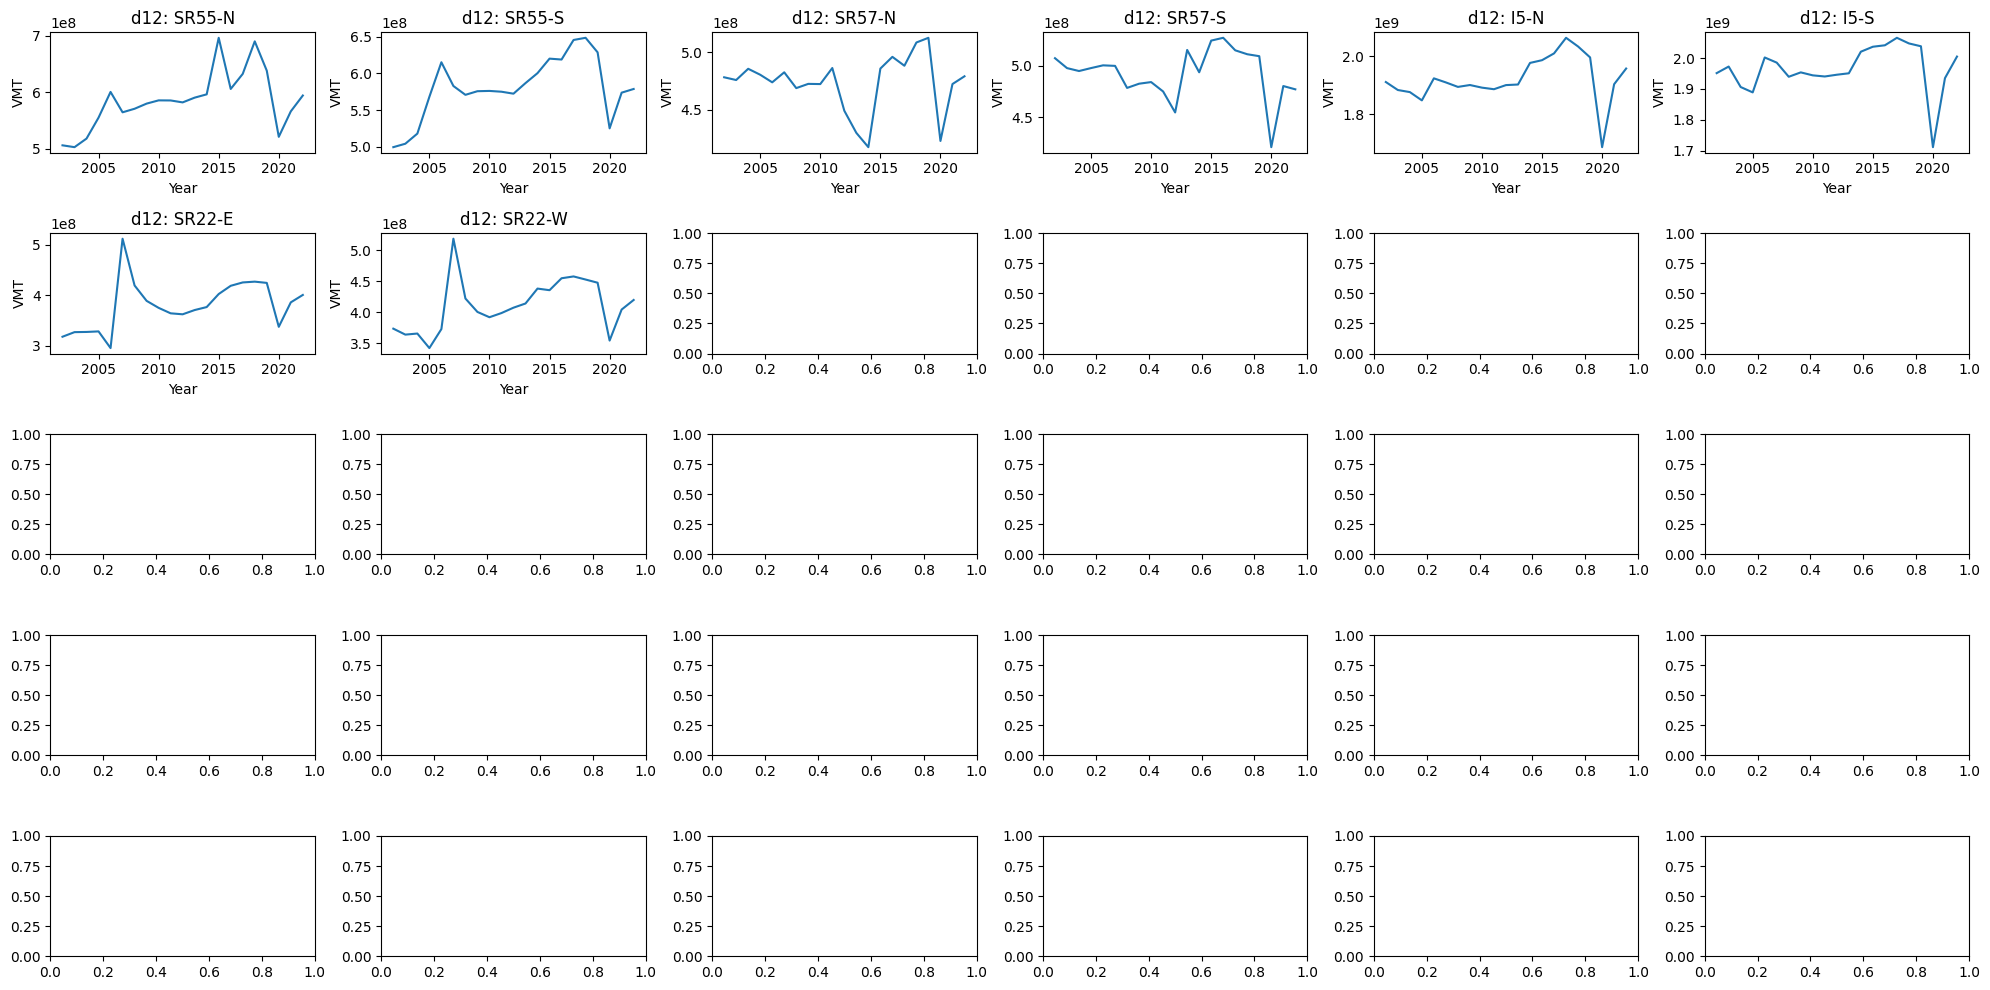

In [29]:
def plot_freeway_vmt(ax, freeway):
    file_names = [f'd12fwy{year}.xlsx' for year in range(2002, 2023)]

    # Initialize a list to store tuples (year, VMT)
    data_list = []

    # Iterate over Excel files and directly extract data
    for file_name in file_names:
        year = int(file_name[-9:-5])
        df = pd.read_excel(file_name)

        # Check if the DataFrame is empty for the given freeway
        if not df[df['Freeway'] == freeway].empty:
            vmt_value = df[df['Freeway'] == freeway]['Vehicle Miles Traveled (VMT)'].iloc[0]
        else:
            vmt_value = 0

        data_list.append((year, vmt_value))

    # Create the result DataFrame directly from the list of tuples
    result_df = pd.DataFrame(data_list, columns=['Year', 'VMT'])

    # Plot the results
    ax.plot(result_df['Year'], result_df['VMT'], label=freeway)
    ax.set_title('d12: ' + freeway)
    ax.set_xlabel('Year')
    ax.set_ylabel('VMT')

# Create subplots for each freeway
fig, axs = plt.subplots(5, 6, figsize=(20, 10))
axs = axs.flatten()

# Iterate over the list of freeways
# freeways = ['I405-N', 'I405-S', 'I5-N', 'I5-S', 'I605-N', 'I605-S', 'SR1-N',
#             'SR1-S', 'SR133-N', 'SR133-S', 'SR142-E', 'SR142-W', 'SR22-E',
#             'SR22-W', 'SR241-N', 'SR241-S', 'SR261-N', 'SR261-S', 'SR55-N',
#             'SR55-S', 'SR57-N', 'SR57-S', 'SR73-N', 'SR73-S', 'SR74-E',
#             'SR74-W', 'SR91-E', 'SR91-W']

freeways = ['SR55-N', 'SR55-S', 'SR57-N', 'SR57-S',
            'I5-N', 'I5-S', 'SR22-E', 'SR22-W']

for i, freeway in enumerate(freeways):
    plot_freeway_vmt(axs[i], freeway)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


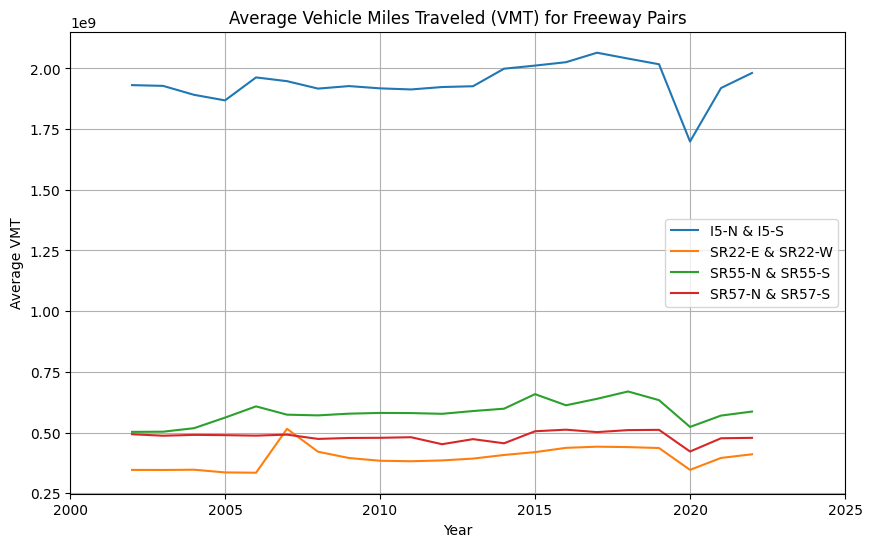

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_vmt(ax, freeway_pairs):
    file_names = [f'd12fwy{year}.xlsx' for year in range(2002, 2023)]

    # Initialize a dictionary to store pairs of freeways and their VMT values
    data_dict = {pair: {'Years': [], 'VMT': []} for pair in freeway_pairs}

    # Iterate over Excel files and directly extract data
    for file_name in file_names:
        year = int(file_name[-9:-5])
        df = pd.read_excel(file_name)

        for pair in freeway_pairs:
            vmt_values = df[df['Freeway'].isin(pair)]['Vehicle Miles Traveled (VMT)']
            
            # Calculate the average VMT for the pair
            avg_vmt = vmt_values.mean() if not vmt_values.empty else 0

            data_dict[pair]['Years'].append(year)
            data_dict[pair]['VMT'].append(avg_vmt)

    # Plot the results for each freeway pair
    for pair, data in data_dict.items():
        ax.plot(data['Years'], data['VMT'], label=f'{pair[0]} & {pair[1]}')

    ax.set_xlabel('Year')
    ax.set_ylabel('Average VMT')

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Specify pairs of freeways to be averaged
freeway_pairs = [('I5-N', 'I5-S'), ('SR22-E', 'SR22-W'),
                 ('SR55-N', 'SR55-S'), ('SR57-N', 'SR57-S'),
                ]

# Plot the average VMT for each pair
plot_average_vmt(ax, freeway_pairs)

# Add legend
ax.legend()
ax.set_title('Average Vehicle Miles Traveled (VMT) for Freeway Pairs')
ax.set_xlim(2000, 2025)
ax.grid()
plt.show()
